In [1]:
import math
import numpy as np
import sklearn as skl
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats

* 贝叶斯公式 &rarr; 类别后验概率 &rArr; 在样本特征$X$的观测值$x$时 判断样本属于类别$\omega_{i}$的概率
$$
p(\omega_{i} | x) = \frac{p(x | \omega_{i}) p(\omega_{i})}{p(x)}
$$
* 先验知识 || 样本估计 &rarr; 类别条件概率密度 &rArr; 在类别$\omega_{i}$下样本特征$X$的概率密度
$$
p(x | \omega_{i})
$$
* 先验知识 || 样本估计 &rarr; 类别先验概率 &rArr; 类别$\omega_{i}$占样本空间的比例
$$
p(\omega_{i})
$$
* 全概率公式 &rarr; 证据因子 &rArr; 样本特征$X$的概率密度
$$
p(x) = \sum_{i = 1}^{c}p(x | \omega_{i}) p(\omega_{i})
$$

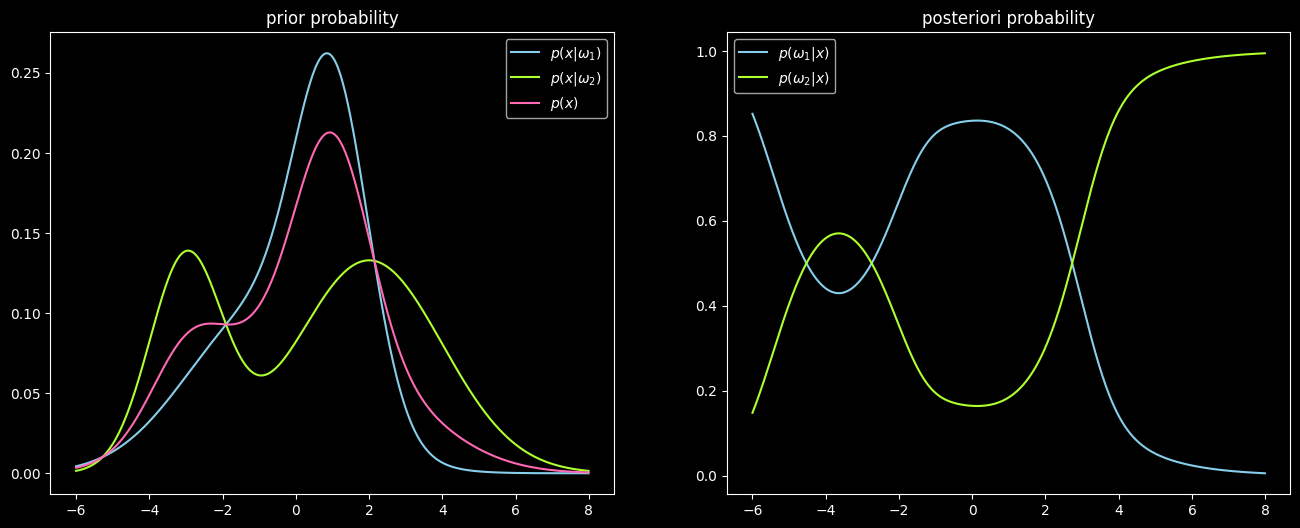

In [14]:
x = np.arange(-6.0, 8.0, 0.01)

p_x_omega1 = stats.norm(loc=-1.0, scale=2.0).pdf(x) * (1/2) + stats.norm(loc=1.0, scale=1.0).pdf(x) * (1/2)
p_x_omega2 = stats.norm(loc=-3.0, scale=1.0).pdf(x) * (1/3) + stats.norm(loc=2.0, scale=2.0).pdf(x) * (2/3)
# 类别条件概率
p_x        = p_x_omega1 * (2/3) + p_x_omega2 * (1/3)
# 证据因子
p_omega1_x = p_x_omega1 * (2/3) / p_x
p_omega2_x = p_x_omega2 * (1/3) / p_x
# 类别后验概率

plt.style.use('dark_background')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axs[0].set_title("prior probability")
axs[0].plot(x, p_x_omega1, color='skyblue',     label=r'$p(x | \omega_{1})$')
axs[0].plot(x, p_x_omega2, color='greenyellow', label=r'$p(x | \omega_{2})$')
axs[0].plot(x, p_x,        color='hotpink',     label=r'$p(x)$')

axs[1].set_title("posteriori probability")
axs[1].plot(x, p_omega1_x, color='skyblue',     label=r'$p(\omega_{1} | x)$')
axs[1].plot(x, p_omega2_x, color='greenyellow', label=r'$p(\omega_{2} | x)$')

axs[0].legend()
axs[1].legend()

plt.show()

* 条件误分类概率 &rArr; 在样本特征$X$的观测值为$x$时 将样本判断为类别$\omega_{i}$出错的概率
$$
p(error | x) = 1 - p(\omega_{i} | x)
$$
* 误分类概率 &rArr; 条件误分类概率$p(error | x)$的期望
$$
p(error) = \int_{-\infty}^{\infty} p(error | x) p(x)dx
$$
* 贝叶斯决策规则 &rArr; 使分类产生的误分类概率$p(error)$最小的决策方法
$$
\hat{\omega} = arg \min_{\omega}p(error) = arg \min_{\omega}p(error | x) = arg \max_{\omega}p(\omega_{i} | x)
$$
* 也就是将后验概率最大的类别作为预测值，由此可知，贝叶斯分类器是理论的最优分类器
<br /><br />
<center> 推广到一般形式 </center>
<center> <font size=8>&dArr; </font></center>

* $c$个类别集
$$
\omega_{1}, \omega_{2}, \dots, \omega_{c}
$$
* $a$个行为集
$$
\alpha_{1}, \alpha_{2}, \dots, \alpha_{a}
$$
* 真实类别为$\omega_{j}$时采取行动$\alpha_{i}$的风险函数
$$
\lambda(\alpha_{i} | \omega_{j})
$$
* 将风险函数扩展为风险矩阵
$$
\mathbf{\Lambda} = 
\begin{pmatrix}
\lambda(\alpha_{1} | \omega_{1})    &   \lambda(\alpha_{1} | \omega_{2})    &   \cdots  &   \lambda(\alpha_{1} | \omega_{c})    \\
\lambda(\alpha_{2} | \omega_{1})    &   \lambda(\alpha_{2} | \omega_{2})    &   \cdots  &   \lambda(\alpha_{2} | \omega_{c})    \\
\vdots                              &   \vdots                              &   \ddots  &   \vdots                              \\
\lambda(\alpha_{a} | \omega_{1})    &   \lambda(\alpha_{a} | \omega_{2})    &   \cdots  &   \lambda(\alpha_{a} | \omega_{c})    \\
\end{pmatrix}
$$
* $d$维特征向量
$$
\mathbf{X} = 
\begin{pmatrix}
x_{1}  \\
x_{2}  \\
\vdots \\
x_{d}  \\
\end{pmatrix}
$$
* 条件联合概率密度
$$
p(\mathbf{x} | \omega_{i}) = p(x_{1}, x_{2}, \dots, x_{d} | \omega_{i})
$$
* 条件风险 &rArr; 在样本特征$\mathbf{X}$的观测值为$\mathbf{x}$时 采取行为$\alpha_{i}$的风险
$$
R(\alpha_{i} | \mathbf{x}) = \sum_{j = 1}^{c} \lambda(\alpha_{i} | \omega_{j}) p(\omega_{j} | \mathbf{x})
$$
* 将条件风险扩展为条件风险向量
$$
\mathbf{R} = 
\begin{pmatrix}
R(\alpha_{1} | \mathbf{x}) \\
R(\alpha_{2} | \mathbf{x}) \\
\vdots                     \\
R(\alpha_{a} | \mathbf{x}) \\
\end{pmatrix}
=
\mathbf{\Lambda}
\begin{pmatrix}
p(\omega_{1} | \mathbf{x}) \\
p(\omega_{2} | \mathbf{x}) \\
\vdots                     \\
p(\omega_{c} | \mathbf{x}) \\
\end{pmatrix}
$$
* 行为函数 &rArr; 对样本特征$X$进行观测之后采取的行为
$$
\mathbf{\alpha}(\mathbf{x}),\quad \mathbf{\alpha} : \mathbb{R}^{d} \to \left \{ \alpha_{1}, \alpha_{2}, \dots, \alpha_{a} \right \}
$$
* 总风险 &rArr; 在行为函数$\mathbf{\alpha}(\mathbf{x})$下的条件风险$R(\mathbf{\alpha}(\mathbf{x}) | \mathbf{x})$的期望
$$
\mathfrak{R} = \int_{\mathbb{R}^{d}} R(\mathbf{\alpha}(\mathbf{x}) | \mathbf{x}) p(\mathbf{x}) d\mathbf{x}
$$
* 贝叶斯决策规则 &rArr; 使行为产生的总风险$\mathfrak{R}$最小的决策方法
$$
\mathbf{\alpha}(\mathbf{x}) = arg \min_{\alpha_{i}} \mathfrak{R}
                            = arg \min_{\alpha_{i}} R(\alpha_{i} | \mathbf{x})
                            = arg \min_{\alpha_{i}} \sum_{j = 1}^{c} \lambda(\alpha_{i} | \omega_{j}) p(\omega_{j} | \mathbf{x})
$$

* 最小误差率分类
<br /><br /><br />
    * 定义行为
    $$
    \alpha_{i}: 将样本判定为类别 \omega_{i}
    $$
    * 定义风险函数 &rArr; 判定正确为0，反之为1
    $$
    \lambda(\alpha_{i} | \omega_{j}) = 
        \left\{
        \begin{matrix}
        0,\quad i = j \\
        1, \quad i \ne j
        \end{matrix}
        \right.
    $$ 
    * 条件风险
    $$
    R(\alpha_{i} | \mathbf{x}) = \sum_{j = 1}^{c} \lambda(\alpha_{i} | \omega_{j}) p(\omega_{j} | \mathbf{x})
                               = \sum_{i \ne j} p(\omega_{j} | \mathbf{x})
                               = 1 - p(\omega_{i} | \mathbf{x})
    $$
    * 贝叶斯决策规则 &rarr; 最优行为函数 &rArr; 将样本判定为类别后验概率最大的类别
    $$
    \mathbf{\alpha}(\mathbf{x}) = arg \min_{\alpha_{i}} R(\alpha_{i} | \mathbf{x})
                                = arg \max_{\alpha_{i}} p(\omega_{i} | \mathbf{x})
    $$
    * 对以上模型进行一定的改进 &rArr; 调整不同类别之间的判错风险
    $$
    \lambda(\alpha_{i} | \omega_{j}) = 
        \left\{
        \begin{matrix}
        0,\quad i = j \\
        \lambda_{ij}, \quad i \ne j
        \end{matrix}
        \right.
    $$
    * 模型会将被判错风险较大的类别的判定域增大

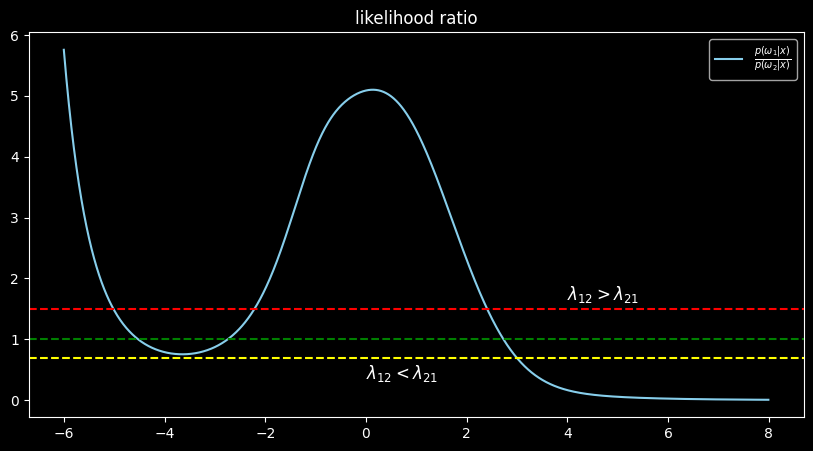

In [22]:
likelihood_ratio = p_omega1_x / p_omega2_x
# 似然比
plt.style.use('dark_background')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.set_title("likelihood ratio")
ax.plot(x, likelihood_ratio, color='skyblue', label=r'$\frac{p(\omega_{1} | x)}{p(\omega_{2} | x)}$')

ax.axhline(1.0, color='green',  linestyle='--')  # 1 => 2的风险等于2 => 1的风险
ax.axhline(1.5, color='red',    linestyle='--')  # 1 => 2的风险小于2 => 1的风险
ax.axhline(0.7, color='yellow', linestyle='--')  # 1 => 2的风险大于2 => 1的风险

ax.text(x=4, y=1.65, s=r'$\lambda_{12} > \lambda_{21}$', fontdict=dict(fontsize=12))
ax.text(x=0, y=0.35, s=r'$\lambda_{12} < \lambda_{21}$', fontdict=dict(fontsize=12))

ax.legend()

plt.show()